#  **<font color='white gray'>@panData</font>**
# - **<font color='white gray'>Data Analysis Projects with Python Language</font>**
# - **<font color='white gray'>Feature Engineering Techniques</font>**


## **Python Packages Used in the Project**

In [1]:
!pip install -q -U watermark

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.8 MB/s eta 0:00:00


In [2]:
# 1. Imports
import re
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
%reload_ext watermark
%watermark -a "@panData"

Author: @panData



### **Loading the Data and Understanding the Variables**

In [4]:
# 2. Loading the data
df = pd.read_csv("dataset.csv")

In [5]:
# 3. Shape
df.shape

(101766, 50)

In [6]:
# 4. Viewing the data
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222167,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
# 5. Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

### **Data Cleaning and Transformation**

In [8]:
# 6. Checking for null (missing) values
df.isnull().sum()

,0
encounter_id,0
patient_nbr,0
race,0
gender,0
age,0
weight,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0


In [9]:
# 7. Checking columns with values equal to '?'
df.isin(['?']).any()

,0
encounter_id,False
patient_nbr,False
race,True
gender,False
age,False
weight,True
admission_type_id,False
discharge_disposition_id,False
admission_source_id,False
time_in_hospital,False


In [10]:
# 8. Columns
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [11]:
# 9. Checking unique values
for col in list(df.columns):

    # Get a list of unique values
    list_of_unique_values = df[col].unique()

    # If the number of unique values is less than 15, print the values.
    # Otherwise, print the number of unique values
    if len(list_of_unique_values) < 15:
        print("\n")
        print(col + ': ' + str(len(list_of_unique_values)) + ' unique values')
        print(list_of_unique_values)
    else:
        print("\n")
        print(col + ': ' + str(len(list_of_unique_values)) + ' unique values')




encounter_id: 101766 unique values


patient_nbr: 71518 unique values


race: 6 unique values
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']


gender: 3 unique values
['Female' 'Male' 'Unknown/Invalid']


age: 10 unique values
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']


weight: 10 unique values
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']


admission_type_id: 8 unique values
[6 1 2 3 4 5 8 7]


discharge_disposition_id: 26 unique values


admission_source_id: 17 unique values


time_in_hospital: 14 unique values
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]


payer_code: 18 unique values


medical_specialty: 73 unique values


num_lab_procedures: 118 unique values


num_procedures: 7 unique values
[0 5 1 6 2 3 4]


num_medications: 75 unique values


number_outpatient: 39 unique values


number_emergency: 33 unique values


number_inpatient: 21 unique va

**The character '?' is simply a missing value. Let's clean this up.**

In [12]:
# 10. Checking the quantity and percentage of records where the value is equal to '?'
for col in df.columns:
    if df[col].dtype == object:
        if df[col][df[col] == '?'].count() > 0:
            print('\nColumn', col, 'has', df[col][df[col] == '?'].count(), 'values with the character "?"')
            print('This represents', round(df[col][df[col] == '?'].count() / len(df.index) * 100, 2), '% of the total')



Column race has 2273 values with the character "?"
This represents 2.23 % of the total

Column weight has 98569 values with the character "?"
This represents 96.86 % of the total

Column payer_code has 40256 values with the character "?"
This represents 39.56 % of the total

Column medical_specialty has 49949 values with the character "?"
This represents 49.08 % of the total

Column diag_1 has 21 values with the character "?"
This represents 0.02 % of the total

Column diag_2 has 358 values with the character "?"
This represents 0.35 % of the total

Column diag_3 has 1423 values with the character "?"
This represents 1.4 % of the total


In [13]:
# 11. The 'gender' column also has a value we need to handle
print('\nColumn gender has', df['gender'][df['gender'] == 'Unknown/Invalid'].count(), 'values with "Unknown/Invalid"')
print('This represents', round(df['gender'][df['gender'] == 'Unknown/Invalid'].count() / len(df.index) * 100, 2), '% of the total')


Column gender has 3 values with "Unknown/Invalid"
This represents 0.0 % of the total


**Now the important part - deciding what to do!**

- There are missing values for **patient weight** in more than **96%** of the records.

- The **payer code** and **medical specialty** also have missing values ranging from **40% to 50%**.

- The remaining variables have a low percentage of missing values.

What should we do?

**Alternatives:**

- Set the **weight** variable as categorical with two labels: available / not available (1 and 0).
- Create a generic code for the **payer_code** variable as 99 and fill in the missing values.
- Assign a generic type for the **medical_specialty** variable as "No Defined Specialty" and fill in the missing values.
- For the **gender** variable, there are only 3 records; it’s ideal to remove them.

**Decision:**

1. Due to the weak interpretability of the missing values in the **weight** variable, it’s best to simply ignore and remove this variable.
  
2. We’ll discard the **payer_code** and **medical_specialty** variables since handling a large amount of missing data would be difficult.

3. We’ll remove the records with "?" from the remaining variables.

4. For the **gender** variable, we’ll remove the 3 records with the "Unknown/Invalid" category.

In [14]:
# 12. Removing the 3 columns with a high percentage of missing values
df = df.drop(['weight', 'payer_code', 'medical_specialty'], axis=1)

**For the remaining variables with a low percentage of missing values, we’ll remove the records.**

In [15]:
# 13. Removing records with a low percentage of missing values
df = df[df['race'] != '?']
df = df[df['diag_1'] != '?']
df = df[df['diag_2'] != '?']
df = df[df['diag_3'] != '?']
df = df[df['gender'] != 'Unknown/Invalid']

In [16]:
# 14. Checking columns with values equal to '?'
df.isin(['?']).any()

,0
encounter_id,False
patient_nbr,False
race,False
gender,False
age,False
admission_type_id,False
discharge_disposition_id,False
admission_source_id,False
time_in_hospital,False
num_lab_procedures,False


In [17]:
# 15. Shape
df.shape

(98052, 47)

Do we have variables with only a single value?

In [18]:
# 16. Viewing the data
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [19]:
# 17. Checking for variables with a single value (i.e., constant)
df.loc[:, df.nunique() == 1].head()

,examide,citoglipton,metformin-rosiglitazone
1,No,No,No
2,No,No,No
3,No,No,No
4,No,No,No
5,No,No,No


**Let's eliminate the columns that have only a single unique value, as they add no value to our analysis. We want to analyze variables, not constants.**

In [20]:
# 18. Removing variables with unique values
df = df.loc[:, df.nunique() != 1]

In [21]:
# 19. Shape
df.shape

(98052, 44)

In [22]:
# 20. Calculating the total number of values in each column
total_values = df.shape[0]

# Calculating the number of missing values in each column
missing_values = df.isnull().sum()

# Calculating the percentage of missing values in each column
missing_percentage = (missing_values / total_values) * 100

# Display only columns with a percentage greater than zero
missing_percentage[missing_percentage > 0]


,0
max_glu_serum,94.688533
A1Cresult,83.485294


In [23]:
# 21. Removing the 2 columns with a high percentage of missing values
df = df.drop(['max_glu_serum', 'A1Cresult'], axis=1)

In [24]:
# 22. Shape
df.shape

(98052, 42)

## **Feature Engineering**

### **Adjusting the Target Variable for Risk Stratification**

A hospital readmission occurs when a patient discharged from the hospital is readmitted within a certain period. Hospital readmission rates for certain conditions are now considered an indicator of hospital quality and also negatively impact medical costs.

Our target variable is **'readmitted'**. We want to determine if a patient will be readmitted to the hospital or not.

The variable has the following values:

- **< 30** (readmission within 30 days)
- **> 30** (readmission after 30 days)
- **No** (no readmission)

We can combine readmission within 30 days and after 30 days into one category (value **1** - positive class) and no readmission into another category (value **0** - negative class) to make our problem a binary classification.

In [25]:
# 23. Viewing the data
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,No,Up,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,No,Up,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,No,Steady,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,No,Steady,No,No,No,No,No,Yes,>30


In [26]:
# 24. Counting values in the 'readmitted' variable
df['readmitted'].value_counts()

,count
readmitted,
NO,52337
>30,34649
<30,11066


In [27]:
# 25. First, let's create a copy of the dataset up to this point
cleaned_data1 = df.copy()

# If you need to return to this point, simply execute:
# df = cleaned_data1

# This way, you won't have to run the entire  notebook up to this point

In [28]:
# 26. Adjusting the target variable

# '0' means no readmission
# '1' means readmission, regardless of the number of days after discharge

df['readmitted'] = df['readmitted'].replace('>30', 1)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('NO', 0)

In [29]:
# 27. Checking unique values
df['readmitted'].unique()

array([1, 0])

In [30]:
# 28. Checking the data type
df['readmitted'].dtype

dtype('int64')

In [31]:
# 29. Viewing the data
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,No,Up,No,No,No,No,Ch,Yes,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,No,Up,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,No,Steady,No,No,No,No,Ch,Yes,0
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,No,Steady,No,No,No,No,No,Yes,1


In [32]:
# 30. Checking the proportion of each class
round(df.readmitted.value_counts() / len(df.index) * 100, 0)

,count
readmitted,
0,53.0
1,47.0


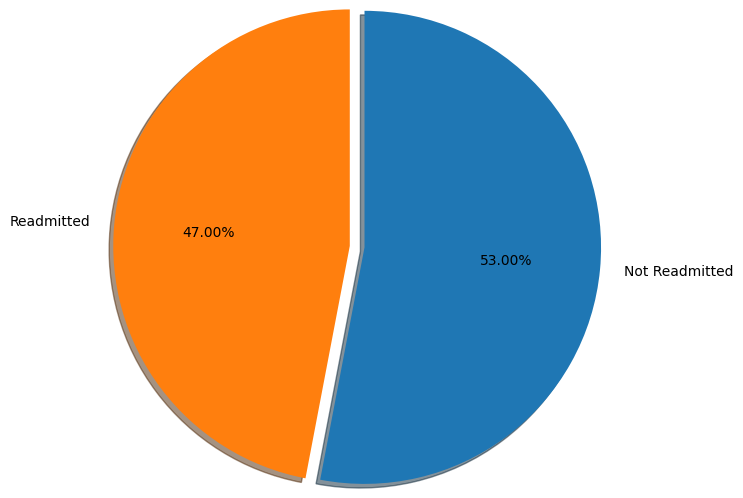

In [33]:
# Adjusting for the provided code context, using df_dsa

# Importing required library
import matplotlib.pyplot as plt

# 31. Visualizing the data graphically

# Percentage of each value in the target variable
percentage = round(df['readmitted'].value_counts() / len(df.index) * 100, 0)

# Labels
labels = ['Not Readmitted', 'Readmitted']

# Plot
plt.axis("equal")
plt.pie(percentage,
        labels=labels,
        radius=1.6,
        autopct='%1.2f%%',
        explode=[0.05, 0.05],
        startangle=90,
        shadow=True,
        counterclock=False,
        pctdistance=0.6)
plt.show()

Approximately **47%** of diabetes patients were readmitted to hospitals.

### **Variable Recategorization**

How should we handle the age variable?

In [34]:
# 33. Variable type
df['age'].dtype

dtype('O')

In [35]:
# 34. Total patients by age group
df.groupby('age').size()

,0
age,
[0-10),65
[10-20),466
[20-30),1478
[30-40),3548
[40-50),9265
[50-60),16697
[60-70),21809
[70-80),25305
[80-90),16702


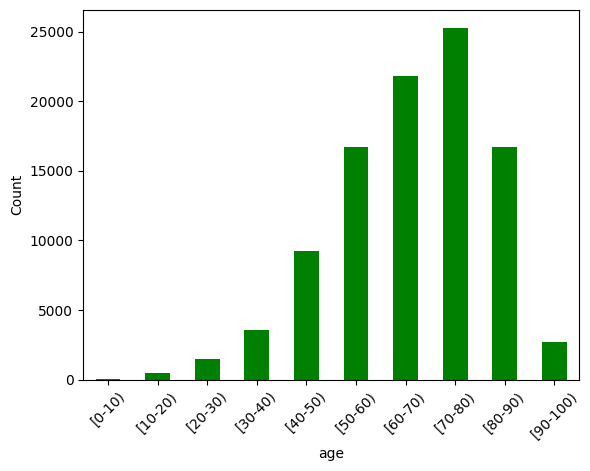

In [36]:
# 35. Checking the variable representing patient age range

# Grouping data by age and plotting a bar chart
df.groupby('age').size().plot(kind='bar', color='green')

# Adding label to the y-axis
plt.ylabel('Count')

# Rotating x-axis labels
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

We can observe that most patients fall within the age range of **50 to 90 years**.

There are different ways to handle this variable. The dataset only provides age in 10-year ranges, so we don’t know each patient's exact age.

We can adopt two approaches:

1. **Numerical Midpoint Approach**: If we want to examine the effect of increasing age on patient readmission, even approximately, we can assume that the patient's age is at the midpoint of their age category. For example, if a patient's age category is 20 to 30 years, we assume an age of 25 years. Then, we convert age categories to midpoints, resulting in a numeric variable.

2. **Categorical Recategorization**: Alternatively, we can recategorize the variable by grouping patients into a smaller number of broader age ranges and keep the variable as categorical. In this case, we could assess the risk by age range instead of specific age values.

We’ll adopt **option 2** as it preserves the information in the data more accurately.

In [37]:
# 36. Recategorizing 'age' to distribute the population more evenly

# Classifying patients up to 50 years in the range of 0-50
df['age'] = pd.Series(['[0-50)' if val in ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)'] else val
                       for val in df['age']], index=df.index)

# Grouping ages above 80 in the range of 80-100
df['age'] = pd.Series(['[80-100)' if val in ['[80-90)', '[90-100)'] else val
                       for val in df['age']], index=df.index)

# The other ranges remain unchanged

In [38]:
# 37. Variable type
df['age'].dtype

dtype('O')

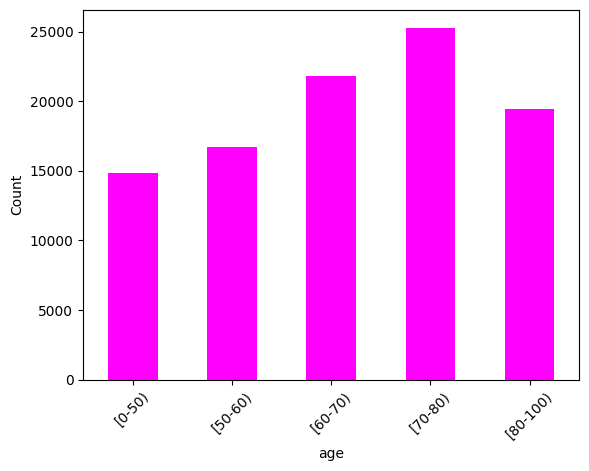

In [39]:
# 38. Checking the variable representing patient age range

# Grouping data by age and plotting a bar chart
df.groupby('age').size().plot(kind='bar', color='magenta')

# Adding label to the y-axis
plt.ylabel('Count')

# Rotating x-axis labels
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

How do we handle ID-type variables? We will proceed with Variable Recategorization.

The variables **'admission_type_id'**, **'discharge_disposition_id'**, and **'admission_source_id'** have values with similar meanings. They can be merged to reduce the number of unique values.

In [40]:
# 39. Viewing the data
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[0-50),1,1,7,3,59,...,No,No,Up,No,No,No,No,Ch,Yes,1
2,64410,86047875,AfricanAmerican,Female,[0-50),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[0-50),1,1,7,2,44,...,No,No,Up,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[0-50),1,1,7,1,51,...,No,No,Steady,No,No,No,No,Ch,Yes,0
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,No,Steady,No,No,No,No,No,Yes,1


Variable **admission_type_id**

In [41]:
# 40. Unique values in 'admission_type_id'
df['admission_type_id'].unique()


array([1, 2, 3, 6, 4, 5, 8, 7])

In [42]:
# 41. Number of unique values in 'admission_type_id'
df['admission_type_id'].nunique()

8

In [43]:
# 42. Value counts for 'admission_type_id'
df['admission_type_id'].value_counts()

,count
admission_type_id,
1,52178
3,18193
2,17543
6,5135
5,4661
8,312
7,20
4,10


In [44]:
# 43. The 'admission_type_id' variable contains 8 levels
# We will reduce the levels of 'admission_type_id' to two categories
df['admission_type_id'] = pd.Series(['Emergency' if val == 1 else 'Other'
                                     for val in df['admission_type_id']], index=df.index)

In [45]:
# 44. Number of unique values in 'admission_type_id' after recategorization
df['admission_type_id'].nunique()

2

In [46]:
# 45. Value counts for 'admission_type_id' after recategorization
df['admission_type_id'].value_counts()

,count
admission_type_id,
Emergency,52178
Other,45874


Variable **discharge_disposition_id**

In [47]:
# 46. Unique values in 'discharge_disposition_id'
df['discharge_disposition_id'].unique()

array([ 1,  3,  6,  2,  5, 11,  7, 25, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27])

In [48]:
# 47. Number of unique values in 'discharge_disposition_id'
df['discharge_disposition_id'].nunique()

26

In [49]:
# 48. Value counts for 'discharge_disposition_id'
df['discharge_disposition_id'].value_counts()

,count
discharge_disposition_id,
1,57609
3,13564
6,12626
18,3624
2,2049
22,1970
11,1606
5,1127
25,941


In [50]:
# 49. The 'discharge_disposition_id' variable contains 26 levels
# We will reduce the levels of 'discharge_disposition_id' to two categories
df['discharge_disposition_id'] = pd.Series(['Home' if val == 1 else 'Other'
                                            for val in df['discharge_disposition_id']], index=df.index)


In [51]:
# 50. Number of unique values in 'discharge_disposition_id' after recategorization
df['discharge_disposition_id'].nunique()


2

In [52]:
# 51. Value counts for 'discharge_disposition_id' after recategorization
df['discharge_disposition_id'].value_counts()

,count
discharge_disposition_id,
Home,57609
Other,40443


Variável **admission_source_id**

In [53]:
# 52. Unique values in 'admission_source_id'
df['admission_source_id'].unique()

array([ 7,  2,  4,  1,  5,  6, 20,  3, 17,  8,  9, 14, 10, 22, 11, 25, 13])

In [54]:
# 53. Number of unique values in 'admission_source_id'
df['admission_source_id'].nunique()

17

In [55]:
# 54. Value counts for 'admission_source_id'
df['admission_source_id'].value_counts()

,count
admission_source_id,
7,55951
1,28355
17,6602
4,2945
6,1893
2,1031
5,846
3,179
20,160


In [56]:
# 55. The 'admission_source_id' variable contains 17 levels
# We will reduce the levels of 'admission_source_id' to three categories
df['admission_source_id'] = pd.Series(['Emergency_Room' if val == 7 else 'Referral' if val == 1 else 'Other'
                                       for val in df['admission_source_id']], index=df.index)


In [57]:
# 56. Number of unique values in 'admission_source_id' after recategorization
df['admission_source_id'].nunique()

3

In [58]:
# 57. Value counts for 'admission_source_id' after recategorization
df['admission_source_id'].value_counts()

,count
admission_source_id,
Emergency_Room,55951
Referral,28355
Other,13746


In [59]:
%watermark -a "@panData"

Author: @panData



In [60]:
%watermark -v -m

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.1.85+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit



In [61]:
%watermark --iversions

pandas    : 2.2.2
matplotlib: 3.8.0
numpy     : 1.26.4
seaborn   : 0.13.2
re        : 2.2.1



---

### **Domain Knowledge-Based Feature Engineering**

How should we handle the variables ‘diag_1’, ‘diag_2’, and ‘diag_3’, which represent medical diagnoses?

In [62]:
# 58. Viewing the data
df[['diag_1', 'diag_2', 'diag_3']].head()

,diag_1,diag_2,diag_3
1,276,250.01,255
2,648,250,V27
3,8,250.43,403
4,197,157,250
5,414,411,250


The dataset includes up to three diagnoses for a given patient (primary, secondary, and additional).

However, each has unique ICD-9 codes, making it extremely difficult to include them in the model and interpret meaningfully.

Therefore, we will reduce these diagnosis codes into four categories, considering comorbidity.

ICD-9 Codes (International Classification of Diseases):

https://en.wikipedia.org/wiki/List_of_ICD-9_codes

http://www.icd9data.com/2013/Volume1/default.htm

https://icd.codes/icd9cm

https://www.cms.gov/Medicare/Coding/ICD9ProviderDiagnosticCodes/codes

In [63]:
# 59. Concatenating 3 variables into a dataframe
diagnosis = df[['diag_1', 'diag_2', 'diag_3']]

In [64]:
# 60. Viewing the data
diagnosis.head(10)

,diag_1,diag_2,diag_3
1,276,250.01,255
2,648,250,V27
3,8,250.43,403
4,197,157,250
5,414,411,250
6,414,411,V45
7,428,492,250
8,398,427,38
9,434,198,486
10,250.7,403,996


In [65]:
# 61. Checking for missing values
diagnosis.isnull().any()

,0
diag_1,False
diag_2,False
diag_3,False


### **Calculating Comorbidity with Feature Engineering**

Defining Comorbidity: Implications for Understanding Health and Health Services:

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2713155/

Comorbidity: Substance Use Disorders and Other Mental Illnesses:

https://www.drugabuse.gov/publications/drugfacts/comorbidity-substance-use-disorders-other-mental-illnesses

In simple terms, comorbidity refers to the presence of more than one disorder in the same person. For example, if a person is diagnosed with Social Anxiety Disorder (SAD) and Major Depressive Disorder (MDD), they are said to have comorbid depressive and anxiety disorders (meaning coexisting).

Other overlapping conditions include physical illnesses such as diabetes, cardiovascular disease, cancer, infectious diseases, and dementia. Mental disorders that tend to show comorbidity include eating disorders, anxiety disorders, and substance abuse.

It is not uncommon for individuals to suffer from two disorders or illnesses simultaneously. Comorbidity in mental illness can involve a situation where a person receives a medical diagnosis followed by a mental disorder diagnosis (or vice versa) or the diagnosis of one mental disorder followed by another.

A large national cross-sectional epidemiological study from 2009 on mental disorder comorbidity in primary care in Spain, published in the Journal of Affective Disorders, revealed that among a sample of 7,936 adult patients, about half had more than one psychiatric disorder.

<a href="https://www.sciencedirect.com/science/article/abs/pii/S016503270900127X?via%3Dihub">Prevalence and comorbidity of common mental disorders in primary care</a>

Additionally, a US National Comorbidity Survey found that 51% of patients diagnosed with depression also had at least one anxiety disorder, and only 26% had no other mental disorder. In the Early Stage of Psychopathology Development, 48.6% of patients diagnosed with depression had at least one anxiety disorder, while 34.8% had no other mental disorder.

<a href="https://www.cambridge.org/core/journals/the-british-journal-of-psychiatry/article/psychiatric-comorbidity-an-artefact-of-current-diagnostic-systems/9DAFC6B16152FFE0F297E4A9DB0A1674/core-reader">‘Psychiatric comorbidity’: an artefact of current diagnostic systems?</a>

Access the site below to find details about regular expression patterns in Python:

https://www.w3schools.com/python/python_regex.asp

In [66]:
# 62. Viewing the data
diagnosis.head(10)

,diag_1,diag_2,diag_3
1,276,250.01,255
2,648,250,V27
3,8,250.43,403
4,197,157,250
5,414,411,250
6,414,411,V45
7,428,492,250
8,398,427,38
9,434,198,486
10,250.7,403,996


In [67]:
# 63. Function that calculates Comorbidity
def calculate_comorbidity(row):

    # Code 250 indicates diabetes
    diabetes_disease_codes = "^[2][5][0]"

    # Codes 39x (x = value between 0 and 9)
    # Codes 4zx (z = value between 0 and 6, and x = value between 0 and 9)
    # These codes indicate circulatory problems
    circulatory_disease_codes = "^[3][9][0-9]|^[4][0-6][0-9]"

    # Initialize return variable
    value = 0

    # Value 0 indicates that:
    # Diabetes and circulatory problems were not detected simultaneously in the patient
    if (not bool(re.match(diabetes_disease_codes, str(np.array(row['diag_1'])))) and
        not bool(re.match(diabetes_disease_codes, str(np.array(row['diag_2'])))) and
        not bool(re.match(diabetes_disease_codes, str(np.array(row['diag_3'])))) and
        not bool(re.match(circulatory_disease_codes, str(np.array(row['diag_1'])))) and
        not bool(re.match(circulatory_disease_codes, str(np.array(row['diag_2'])))) and
        not bool(re.match(circulatory_disease_codes, str(np.array(row['diag_3']))))):
        value = 0

    # Value 1 indicates that:
    # At least one diagnosis of diabetes AND circulatory problems was detected simultaneously in the patient
    elif (bool(re.match(diabetes_disease_codes, str(np.array(row['diag_1'])))) or
          bool(re.match(diabetes_disease_codes, str(np.array(row['diag_2'])))) or
          bool(re.match(diabetes_disease_codes, str(np.array(row['diag_3'])))) and
          not bool(re.match(circulatory_disease_codes, str(np.array(row['diag_1'])))) and
          not bool(re.match(circulatory_disease_codes, str(np.array(row['diag_2'])))) and
          not bool(re.match(circulatory_disease_codes, str(np.array(row['diag_3']))))):
        value = 1

    # Value 2 indicates that:
    # Diabetes and at least one diagnosis of circulatory problems were detected simultaneously in the patient
    elif (not bool(re.match(diabetes_disease_codes, str(np.array(row['diag_1'])))) and
          not bool(re.match(diabetes_disease_codes, str(np.array(row['diag_2'])))) and
          not bool(re.match(diabetes_disease_codes, str(np.array(row['diag_3'])))) and
          (bool(re.match(circulatory_disease_codes, str(np.array(row['diag_1'])))) or
           bool(re.match(circulatory_disease_codes, str(np.array(row['diag_2'])))) or
           bool(re.match(circulatory_disease_codes, str(np.array(row['diag_3'])))))):
        value = 2

    # Value 3 indicates that:
    # At least one diagnosis of diabetes and at least one diagnosis of circulatory problems
    # were detected simultaneously in the patient
    elif (bool(re.match(diabetes_disease_codes, str(np.array(row['diag_1'])))) or
          bool(re.match(diabetes_disease_codes, str(np.array(row['diag_2'])))) or
          bool(re.match(diabetes_disease_codes, str(np.array(row['diag_3'])))) and
          (bool(re.match(circulatory_disease_codes, str(np.array(row['diag_1'])))) or
           bool(re.match(circulatory_disease_codes, str(np.array(row['diag_2'])))) or
           bool(re.match(circulatory_disease_codes, str(np.array(row['diag_3'])))))):
        value = 3

    return value

> Now we apply the function to the data!

In [68]:
# 64. Applying the comorbidity function to the data
%%time
df['comorbidity'] = diagnosis.apply(calculate_comorbidity, axis=1)

CPU times: user 7.73 s, sys: 28.2 ms, total: 7.76 s
Wall time: 7.92 s


In [69]:
# 65. Shape
df.shape

(98052, 43)

In [70]:
# 66. Viewing the data
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,comorbidity
1,149190,55629189,Caucasian,Female,[0-50),Emergency,Home,Emergency_Room,3,59,...,No,Up,No,No,No,No,Ch,Yes,1,1
2,64410,86047875,AfricanAmerican,Female,[0-50),Emergency,Home,Emergency_Room,2,11,...,No,No,No,No,No,No,No,Yes,0,1
3,500364,82442376,Caucasian,Male,[0-50),Emergency,Home,Emergency_Room,2,44,...,No,Up,No,No,No,No,Ch,Yes,0,1
4,16680,42519267,Caucasian,Male,[0-50),Emergency,Home,Emergency_Room,1,51,...,No,Steady,No,No,No,No,Ch,Yes,0,1
5,35754,82637451,Caucasian,Male,[50-60),Other,Home,Other,3,31,...,No,Steady,No,No,No,No,No,Yes,1,3


In [71]:
# 67. Unique values in 'comorbidity'
df['comorbidity'].unique()

array([1, 3, 2, 0])

In [72]:
# 68. Unique value counts in 'comorbidity'
df['comorbidity'].value_counts()

,count
comorbidity,
2,39807
1,27182
0,22389
3,8674


In [73]:
# 69. Dropping individual diagnosis variables
df.drop(['diag_1', 'diag_2', 'diag_3'], axis=1, inplace=True)

In [74]:
# 70. Calculating the percentage of comorbidity by type and target variable class
percent_com = pd.crosstab(df['comorbidity'], df['readmitted'], normalize='index') * 100

In [75]:
percent_com

readmitted,0,1
comorbidity,,
0,55.509402,44.490598
1,53.391951,46.608049
2,51.782350,48.217650
3,55.141803,44.858197


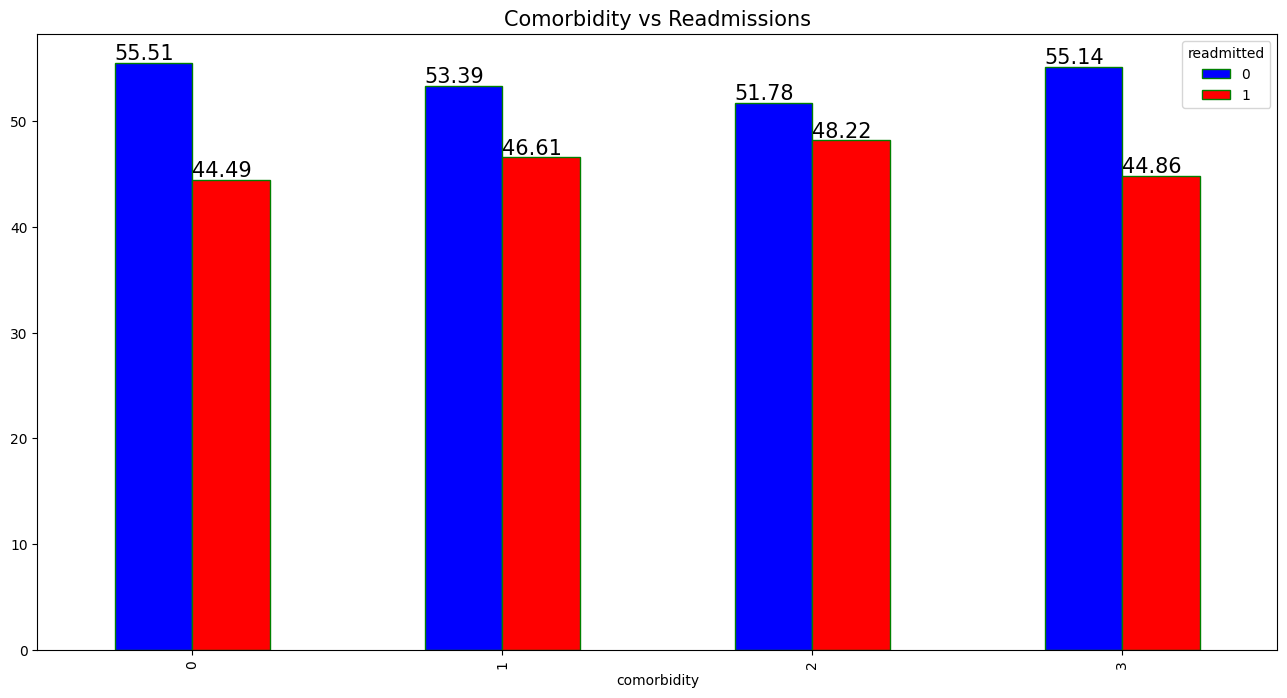

In [76]:
# 71. Plot

# Prepare the figure from the data
fig = percent_com.plot(kind='bar',
                       figsize=(16, 8),
                       width=0.5,
                       edgecolor='g',
                       color=['b', 'r'])

# Draw each group
for i in fig.patches:
    fig.text(i.get_x() + 0.00,
             i.get_height() + 0.3,
             str(round((i.get_height()), 2)),
             fontsize=15,
             color='black',
             rotation=0)

# Title and display
plt.title("Comorbidity vs Readmissions", fontsize=15)
plt.show()

In [77]:
# Plot legend:

# Value 0 indicates that:
# Diabetes and circulatory problems were not detected simultaneously in the patient

# Value 1 indicates that:
# At least one diagnosis of diabetes AND circulatory problems were detected simultaneously in the patient

# Value 2 indicates that:
# Diabetes and at least one diagnosis of circulatory problems were detected simultaneously in the patient

# Value 3 indicates that:
# At least one diagnosis of diabetes and at least one diagnosis of circulatory problems were detected
# simultaneously in the patient

### **Feature Engineering - Recoding of Categorical Variables**

**Medication Dosage Variables and Grouping of Variables**

Checking our dataset up to this point:

In [78]:
# 72. Viewing the data
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,comorbidity
1,149190,55629189,Caucasian,Female,[0-50),Emergency,Home,Emergency_Room,3,59,...,No,Up,No,No,No,No,Ch,Yes,1,1
2,64410,86047875,AfricanAmerican,Female,[0-50),Emergency,Home,Emergency_Room,2,11,...,No,No,No,No,No,No,No,Yes,0,1
3,500364,82442376,Caucasian,Male,[0-50),Emergency,Home,Emergency_Room,2,44,...,No,Up,No,No,No,No,Ch,Yes,0,1
4,16680,42519267,Caucasian,Male,[0-50),Emergency,Home,Emergency_Room,1,51,...,No,Steady,No,No,No,No,Ch,Yes,0,1
5,35754,82637451,Caucasian,Male,[50-60),Other,Home,Other,3,31,...,No,Steady,No,No,No,No,No,Yes,1,3


In [79]:
# 73. Viewing column names
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted', 'comorbidity'],
      dtype='object')

The dataset contains 23 features for 23 medications, indicating, for each, whether a change in the medication was made during the patient’s current hospital stay.

Let’s plot a few variables that indicate medication usage.

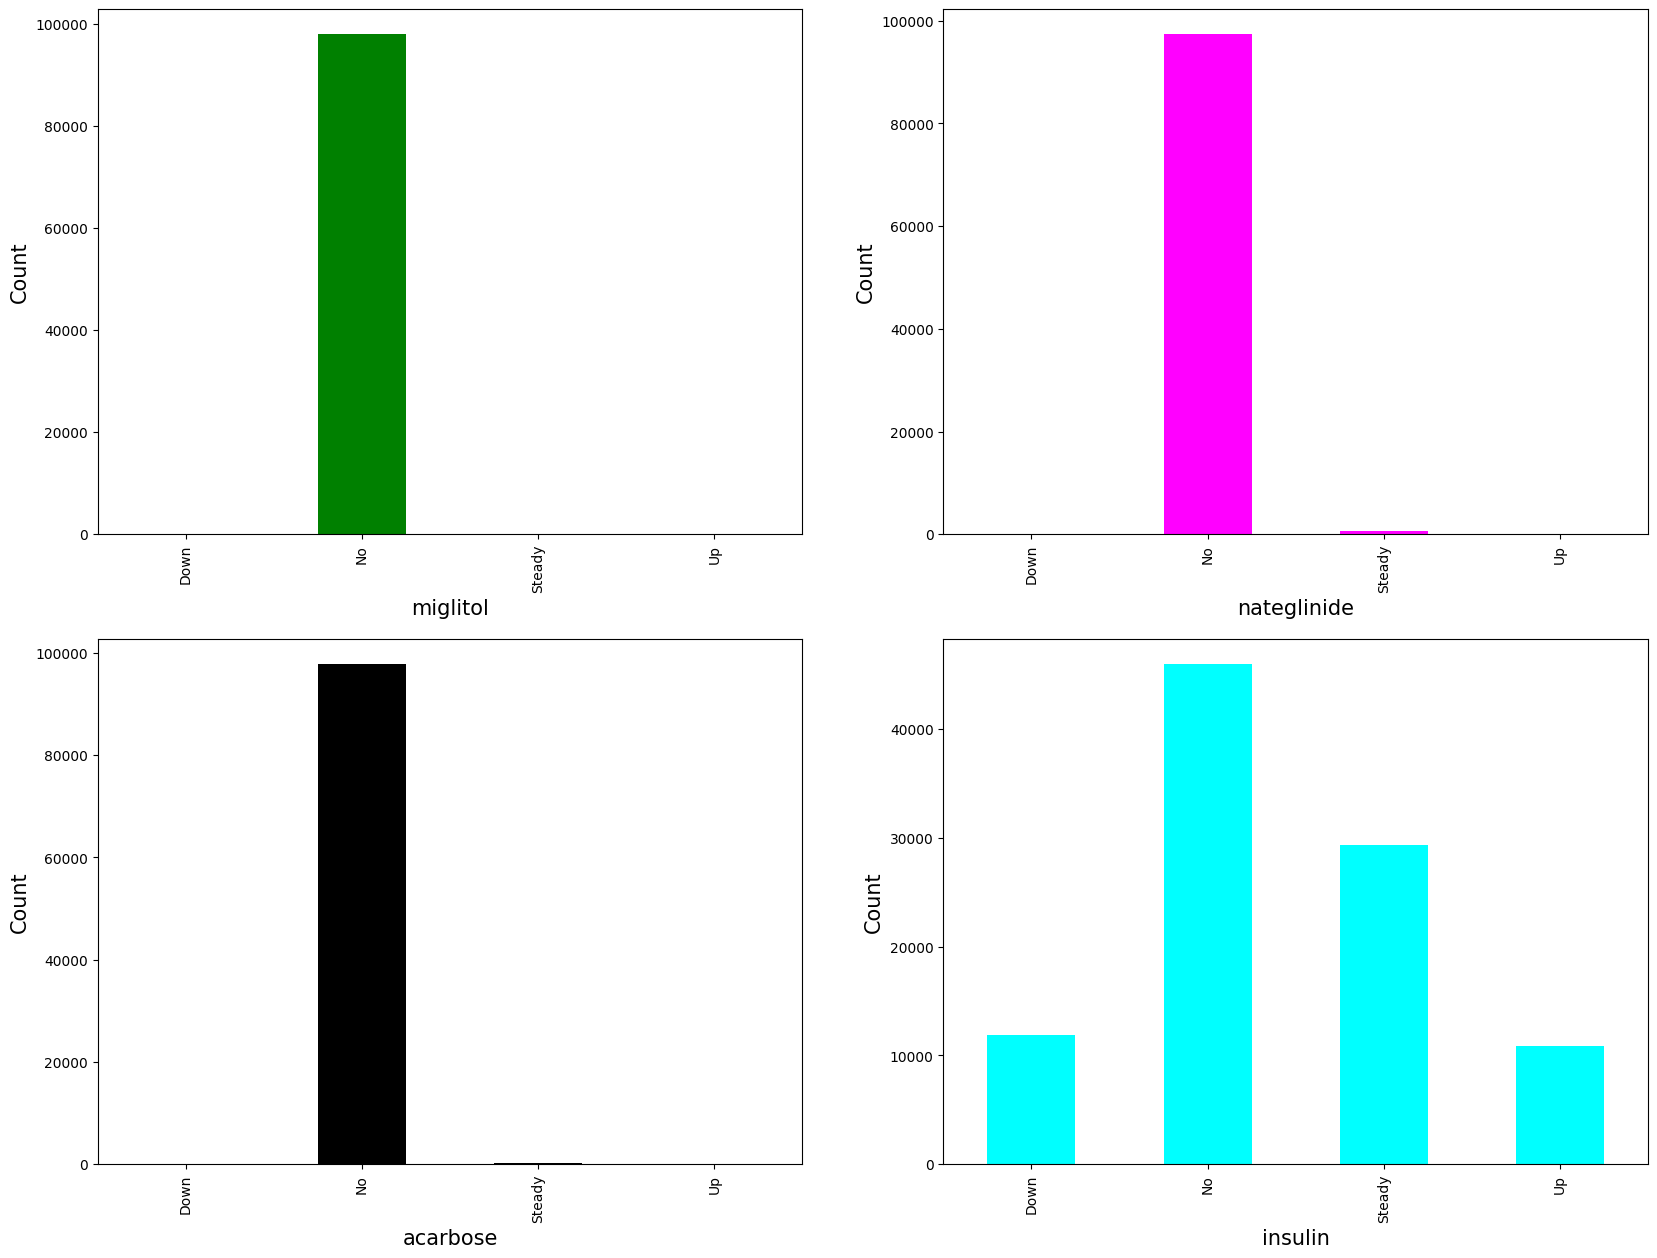

In [80]:
# 74. Plot
fig = plt.figure(figsize=(20, 15))

ax1 = fig.add_subplot(221)
ax1 = df.groupby('miglitol').size().plot(kind='bar', color='green')
plt.xlabel('miglitol', fontsize=15)
plt.ylabel('Count', fontsize=15)

ax2 = fig.add_subplot(222)
ax2 = df.groupby('nateglinide').size().plot(kind='bar', color='magenta')
plt.xlabel('nateglinide', fontsize=15)
plt.ylabel('Count', fontsize=15)

ax3 = fig.add_subplot(223)
ax3 = df.groupby('acarbose').size().plot(kind='bar', color='black')
plt.xlabel('acarbose', fontsize=15)
plt.ylabel('Count', fontsize=15)

ax4 = fig.add_subplot(224)
ax4 = df.groupby('insulin').size().plot(kind='bar', color='cyan')
plt.xlabel('insulin', fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.show()

We can count the total number of medication changes made for each patient and create a new attribute. This may help uncover a relationship with the number of changes, regardless of which medication was changed.

Additionally, we can create a new attribute indicating the total number of medications each patient consumed during their stay. Then, we evaluate whether there’s a relationship between this total and readmission.

In [81]:
# 75. List of medication variable names (3 variables were previously removed)
medications = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
               'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
               'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
               'glimepiride-pioglitazone', 'metformin-pioglitazone']

In [82]:
# 76. Loop to adjust the value of medication variables
for col in medications:
    if col in df.columns:
        colname = str(col) + 'temp'
        df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)

In [83]:
# 77. Viewing the data
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,rosiglitazonetemp,acarbosetemp,miglitoltemp,troglitazonetemp,tolazamidetemp,insulintemp,glyburide-metformintemp,glipizide-metformintemp,glimepiride-pioglitazonetemp,metformin-pioglitazonetemp
1,149190,55629189,Caucasian,Female,[0-50),Emergency,Home,Emergency_Room,3,59,...,0,0,0,0,0,1,0,0,0,0
2,64410,86047875,AfricanAmerican,Female,[0-50),Emergency,Home,Emergency_Room,2,11,...,0,0,0,0,0,0,0,0,0,0
3,500364,82442376,Caucasian,Male,[0-50),Emergency,Home,Emergency_Room,2,44,...,0,0,0,0,0,1,0,0,0,0
4,16680,42519267,Caucasian,Male,[0-50),Emergency,Home,Emergency_Room,1,51,...,0,0,0,0,0,0,0,0,0,0
5,35754,82637451,Caucasian,Male,[50-60),Other,Home,Other,3,31,...,0,0,0,0,0,0,0,0,0,0


In [84]:
# 78. Creating a variable to store the count per patient
df['num_med_dosage_changes'] = 0

In [85]:
# 79. Counting medication dosage changes
for col in medications:
    if col in df.columns:
        colname = str(col) + 'temp'
        df['num_med_dosage_changes'] = df['num_med_dosage_changes'] + df[colname]
        del df[colname]

In [86]:
# 80. Checking the total count of medication dosage changes
df.num_med_dosage_changes.value_counts()

,count
num_med_dosage_changes,
0,71309
1,25350
2,1281
3,107
4,5


In [87]:
# 81. Viewing the data
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,comorbidity,num_med_dosage_changes
1,149190,55629189,Caucasian,Female,[0-50),Emergency,Home,Emergency_Room,3,59,...,Up,No,No,No,No,Ch,Yes,1,1,1
2,64410,86047875,AfricanAmerican,Female,[0-50),Emergency,Home,Emergency_Room,2,11,...,No,No,No,No,No,No,Yes,0,1,0
3,500364,82442376,Caucasian,Male,[0-50),Emergency,Home,Emergency_Room,2,44,...,Up,No,No,No,No,Ch,Yes,0,1,1
4,16680,42519267,Caucasian,Male,[0-50),Emergency,Home,Emergency_Room,1,51,...,Steady,No,No,No,No,Ch,Yes,0,1,0
5,35754,82637451,Caucasian,Male,[50-60),Other,Home,Other,3,31,...,Steady,No,No,No,No,No,Yes,1,3,0


Let’s modify the values in the medication columns to reflect whether each medication is being administered to a patient or not.

In [88]:
# 82. Recoding medication columns
for col in medications:
    if col in df.columns:
        df[col] = df[col].replace('No', 0)
        df[col] = df[col].replace('Steady', 1)
        df[col] = df[col].replace('Up', 1)
        df[col] = df[col].replace('Down', 1)

Now, let’s create an additional column to reflect the total number of medications being administered to a patient.

In [89]:
# 83. Variable to store the count of medications per patient
df['num_med'] = 0

In [90]:
# 84. Populating the new variable
for col in medications:
    if col in df.columns:
        df['num_med'] = df['num_med'] + df[col]

In [91]:
# 85. Checking the total count of medications
df['num_med'].value_counts()

,count
num_med,
1,45447
0,22702
2,21056
3,7485
4,1300
5,57
6,5


After creating these two columns, we can remove the individual medication columns.

In [92]:
# 86. Removing the medication columns
df = df.drop(columns=medications)

In [93]:
# 87. Shape
df.shape

(98052, 22)

In [94]:
# 88. Viewing the data
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted,comorbidity,num_med_dosage_changes,num_med
1,149190,55629189,Caucasian,Female,[0-50),Emergency,Home,Emergency_Room,3,59,...,0,0,0,9,Ch,Yes,1,1,1,1
2,64410,86047875,AfricanAmerican,Female,[0-50),Emergency,Home,Emergency_Room,2,11,...,2,0,1,6,No,Yes,0,1,0,1
3,500364,82442376,Caucasian,Male,[0-50),Emergency,Home,Emergency_Room,2,44,...,0,0,0,7,Ch,Yes,0,1,1,1
4,16680,42519267,Caucasian,Male,[0-50),Emergency,Home,Emergency_Room,1,51,...,0,0,0,5,Ch,Yes,0,1,0,2
5,35754,82637451,Caucasian,Male,[50-60),Other,Home,Other,3,31,...,0,0,0,9,No,Yes,1,3,0,1


In [95]:
# 89. Variables and their data types
df.dtypes

,0
encounter_id,int64
patient_nbr,int64
race,object
gender,object
age,object
admission_type_id,object
discharge_disposition_id,object
admission_source_id,object
time_in_hospital,int64
num_lab_procedures,int64


**Recoding Categorical Variables**

Let’s perform the recoding for a few categorical variables.

In [96]:
# 90. Value counts for 'change'
df['change'].value_counts()

,count
change,
No,52774
Ch,45278


In [97]:
# 91. Value counts for 'gender'
df['gender'].value_counts()

,count
gender,
Female,52833
Male,45219


In [98]:
# 92. Value counts for 'diabetesMed'
df['diabetesMed'].value_counts()

,count
diabetesMed,
Yes,75350
No,22702


In [99]:
# 93. Recoding binary categorical variables
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)

In [100]:
# 94. Viewing the data
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted,comorbidity,num_med_dosage_changes,num_med
1,149190,55629189,Caucasian,0,[0-50),Emergency,Home,Emergency_Room,3,59,...,0,0,0,9,1,1,1,1,1,1
2,64410,86047875,AfricanAmerican,0,[0-50),Emergency,Home,Emergency_Room,2,11,...,2,0,1,6,0,1,0,1,0,1
3,500364,82442376,Caucasian,1,[0-50),Emergency,Home,Emergency_Room,2,44,...,0,0,0,7,1,1,0,1,1,1
4,16680,42519267,Caucasian,1,[0-50),Emergency,Home,Emergency_Room,1,51,...,0,0,0,5,1,1,0,1,0,2
5,35754,82637451,Caucasian,1,[50-60),Other,Home,Other,3,31,...,0,0,0,9,0,1,1,3,0,1


Some patients in the dataset had more than one encounter.

We cannot count these as independent encounters, as it would skew the results for patients with multiple encounters. So, we explored various techniques to consolidate multiple encounters for the same patient, such as:

  *	Considering the average hospital stay across multiple encounters.


  *	Considering the percentage of medication changes across encounters.


	* Using the total number of encounters to replace the unique encounter ID.


  *	Combining diagnoses from multiple encounters into a list.

In the end, the best approach was to keep only one encounter record per patient, opting to retain the first encounter.

In [101]:
# 95. Removing duplicates by patient ID, keeping the first record
df = df.drop_duplicates(subset=['patient_nbr'], keep='first')

In [102]:
# 96. Shape
df.shape

(68629, 22)

In [103]:
# 97. Viewing the data
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted,comorbidity,num_med_dosage_changes,num_med
1,149190,55629189,Caucasian,0,[0-50),Emergency,Home,Emergency_Room,3,59,...,0,0,0,9,1,1,1,1,1,1
2,64410,86047875,AfricanAmerican,0,[0-50),Emergency,Home,Emergency_Room,2,11,...,2,0,1,6,0,1,0,1,0,1
3,500364,82442376,Caucasian,1,[0-50),Emergency,Home,Emergency_Room,2,44,...,0,0,0,7,1,1,0,1,1,1
4,16680,42519267,Caucasian,1,[0-50),Emergency,Home,Emergency_Room,1,51,...,0,0,0,5,1,1,0,1,0,2
5,35754,82637451,Caucasian,1,[50-60),Other,Home,Other,3,31,...,0,0,0,9,0,1,1,3,0,1


In [104]:
# 98. Saving the dataset
df.to_csv('project_result.csv', index=False)

In [105]:
%watermark -a "@panData"

Author: @panData



In [106]:
%watermark -v -m

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.1.85+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit



In [107]:
%watermark --iversions

pandas    : 2.2.2
matplotlib: 3.8.0
numpy     : 1.26.4
seaborn   : 0.13.2
re        : 2.2.1



# **The End**